<a href="https://colab.research.google.com/github/shtomar-adb/CMPE-255-Assignmen2-Dimensionality-Reduction/blob/main/Assignment_2_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA: Dimensionality Reduction on Tabular Data Set  
> Data set choosen is __mpg__ from sns. Which contains the car gas mileage.

In [1]:
#Importing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading data set
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#Imputing the missing data with mean values
df.isna().sum()
print("Null count::",df.horsepower.isnull().sum())
df.horsepower.fillna(value=df.horsepower.mean(), inplace=True)
print("Null count after imputation::", df.horsepower.isnull().sum())


Null count:: 6
Null count after imputation:: 0


In [4]:
X_variables = df.iloc[:, :7]
X_variables

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [5]:
# Data Normalization
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)
transformed_df

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.63086987,
        -1.29549834, -1.62742629],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.85433297,
        -1.47703779, -1.62742629],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.55047045,
        -1.65857724, -1.62742629],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -0.79858454,
        -1.4407299 ,  1.62198339],
       [ 0.57460104, -0.85632057, -0.70507731, ..., -0.40841088,
         1.10082237,  1.62198339],
       [ 0.95891297, -0.85632057, -0.71467988, ..., -0.29608816,
         1.39128549,  1.62198339]])

In [6]:
#Applying PCA
pca = PCA()
pca = pca.fit(transformed_df)
explained_variance = pca.explained_variance_ratio_

#Printing Explained variance ratio
explained_variance

array([0.71421196, 0.12368206, 0.10411867, 0.02672353, 0.01817595,
       0.00806647, 0.00502135])

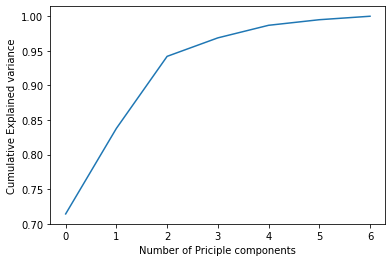

In [7]:
#Plotting the Explained variance ratio against number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Priciple components")
plt.ylabel("Cumulative Explained variance")
plt.show()

In [8]:
#Transforming data
pca_2 = PCA(n_components=3)
pca_2 = pca_2.fit(transformed_df)
df_3d = pca_2.transform(X_variables)

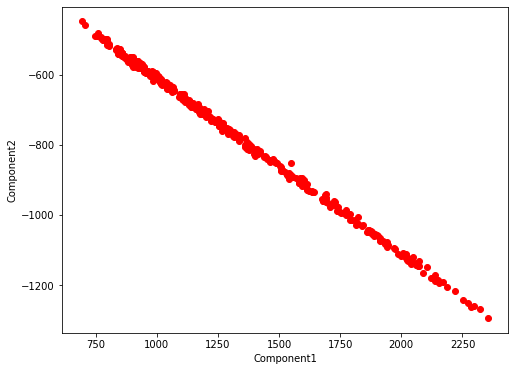

In [43]:
#Plotting the reduced data
plt.figure(figsize=(8,6))
plt.scatter(df_3d[:, 0], df_3d[:, 1], c='red')
plt.xlabel("Component1")
plt.ylabel("Component2")
plt.show()

## PCA: Dimensionality reduction of Image
> Dataset chosen is hand written digits from the sklear.datasets

In [10]:
#Loading data set
from sklearn.datasets import load_digits
digits_df = load_digits()
digits_df.data.shape

(1797, 64)

In [11]:
digits_df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
# Applying PCA
pca = PCA(n_components=2)
updated_data = pca.fit_transform(digits_df.data)
print(digits_df.data.shape)
print(updated_data.shape)

(1797, 64)
(1797, 2)


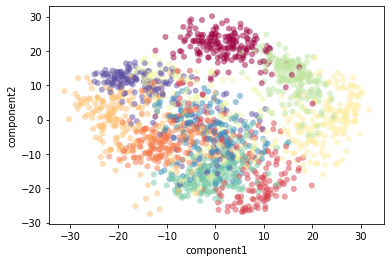

In [13]:
#Plotting the data
plt.scatter(updated_data[:,0], updated_data[:, 1], c=digits_df.target, edgecolors='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## SVD: tabular data dimensionality reduction
> Data set choosen is __mpg__ from sns. Which contains the car gas mileage.

In [14]:
#We are going to use the X_Variables and ˇTransformed_df that we calculated above
X_variables.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [15]:
transformed_df

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.63086987,
        -1.29549834, -1.62742629],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.85433297,
        -1.47703779, -1.62742629],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.55047045,
        -1.65857724, -1.62742629],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -0.79858454,
        -1.4407299 ,  1.62198339],
       [ 0.57460104, -0.85632057, -0.70507731, ..., -0.40841088,
         1.10082237,  1.62198339],
       [ 0.95891297, -0.85632057, -0.71467988, ..., -0.29608816,
         1.39128549,  1.62198339]])

In [16]:
u,s,v = np.linalg.svd(transformed_df, full_matrices=True)

In [17]:
print(u.shape)
print(s.shape)
print(v.shape)

(398, 398)
(7,)
(7, 7)


[0.714 0.124 0.104 0.027 0.018 0.008 0.005]


Text(0, 0.5, '% of variance explained')

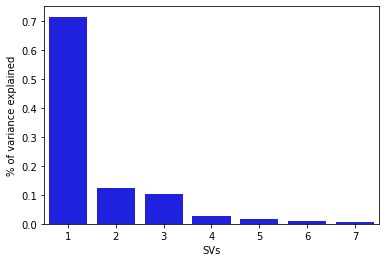

In [18]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(variance_explained)

sns.barplot(x=list(range(1, len(variance_explained) + 1)), y=variance_explained, color="blue")
plt.xlabel("SVs")
plt.ylabel("% of variance explained")


In [19]:
#Plotting the reduced data
col_lables = ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], columns=col_lables)
svd_df.head()

,SV1,SV2
0,-0.059634,-0.049519
1,-0.078949,-0.042525
2,-0.067179,-0.046400
3,-0.065817,-0.051128
4,-0.065665,-0.050200


Text(0, 0.5, 'SV2 12.4%')

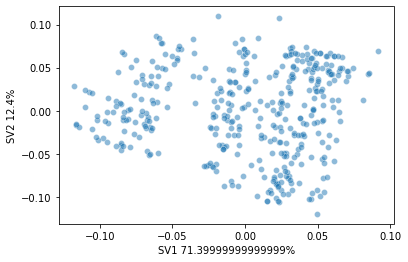

In [20]:
sns.scatterplot(x="SV1", y="SV2",data=svd_df, alpha=0.5)
plt.xlabel('SV1 {0}%'.format(variance_explained[0] * 100))
plt.ylabel('SV2 {0}%'.format(variance_explained[1] * 100))

#SVD: DImensionality reduction on images
> Dataset will be digits dataset that was loaded in PCA

In [21]:
print(digits_df.data.shape)

#Applying SVD
u,s,v = np.linalg.svd(digits_df.data, full_matrices=True)
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(variance_explained)

(1797, 64)
[0.696 0.047 0.043 0.037 0.026 0.018 0.015 0.013 0.011 0.01  0.008 0.007
 0.006 0.006 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


Text(0, 0.5, '% of variance explained')

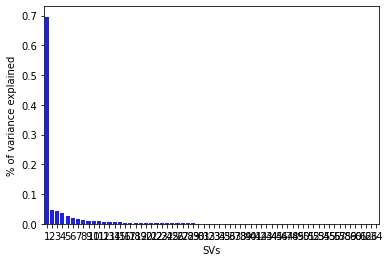

In [22]:
#Plotting the variance
sns.barplot(x=list(range(1, len(variance_explained) + 1)), y=variance_explained, color="blue")
plt.xlabel("SVs")
plt.ylabel("% of variance explained")

In [23]:
#Plotting the reduced data
col_lables = ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], columns=col_lables)
svd_df.head()

,SV1,SV2
0,0.020911,-0.002103
1,0.025320,0.013866
2,0.025456,0.012195
3,0.020581,-0.028023
4,0.018577,0.041213


Text(0, 0.5, 'SV2 4.7%')

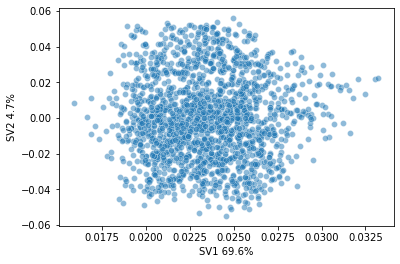

In [24]:
sns.scatterplot(x="SV1", y="SV2",data=svd_df, alpha=0.5)
plt.xlabel('SV1 {0}%'.format(variance_explained[0] * 100))
plt.ylabel('SV2 {0}%'.format(variance_explained[1] * 100))

## LLE: Dimensionality Reduction of Tabular Data
> Data set is the __mpg__ dataset from sns as retrieved in PCA

In [25]:
print(X_variables.head())
print(transformed_df)

    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70
[[-0.7064387   1.49819126  1.0906037  ...  0.63086987 -1.29549834
  -1.62742629]
 [-1.09075062  1.49819126  1.5035143  ...  0.85433297 -1.47703779
  -1.62742629]
 [-0.7064387   1.49819126  1.19623199 ...  0.55047045 -1.65857724
  -1.62742629]
 ...
 [ 1.08701694 -0.85632057 -0.56103873 ... -0.79858454 -1.4407299
   1.62198339]
 [ 0.57460104 -0.85632057 -0.70507731 ... -0.40841088  1.10082237
   1.62198339]
 [ 0.95891297 -0.85632057 -0.71467988 ... -0.29608816  1.39128549
   1.62198339]]


In [44]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

print("Shape before applying LLE:: ", X_variables.shape)

lle = LLE(n_neighbors=5,n_components=2,eigen_solver='auto',method='standard',neighbors_algorithm='auto')
X_transformed = lle.fit_transform(transformed_df)

print("Shape After applying LLE:: ", X_transformed.shape)


Shape before applying LLE::  (398, 7)
Shape After applying LLE::  (398, 2)


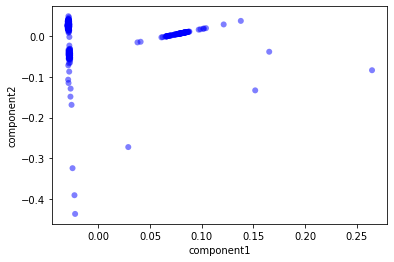

In [45]:
#Plotting the new dimensions
plt.scatter(X_transformed[:,0], X_transformed[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## LLE: Dimensionality Reduction of Image data
> Data set used is imags of digits as prepated in the PCA

In [28]:
print("Shape before applying LLE:: ", digits_df.data.shape)

lle = LLE(n_neighbors=30,n_components=2,eigen_solver='auto',method='standard',neighbors_algorithm='auto')
reduced_data = lle.fit_transform(digits_df.data)

print("Shape After applying LLE:: ", reduced_data.shape)

Shape before applying LLE::  (1797, 64)
Shape After applying LLE::  (1797, 2)


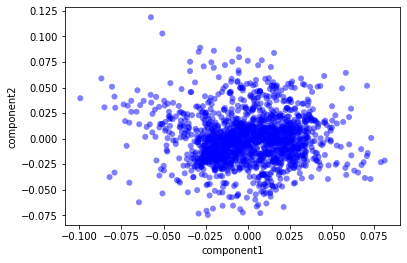

In [29]:
#Plotting the new dimensions
plt.scatter(reduced_data[:,0], reduced_data[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## ISOMAP: Dimensionality Reduction on Tabular Data
> Data set used is __mpg__ retrieved in PCA

In [46]:
from sklearn.manifold import Isomap
    
print("Shape before applying Isomap:: ", transformed_df.shape)
isomap = Isomap(n_neighbors=30, n_components=2)    
result_isomap = isomap.fit_transform(transformed_df)
print("Shape after applying isomap:: ", result_isomap.shape)
    
    

Shape before applying Isomap::  (398, 7)
Shape after applying isomap::  (398, 2)


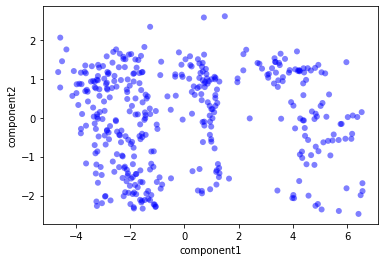

In [47]:
#Plotting the new dimensions
plt.scatter(result_isomap[:,0], result_isomap[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## ISOMAP: Dimensionality reduction on Image data
> Data set used is digit images

In [32]:
print("Shape before applying Isomap:: ", digits_df.data.shape)
isomap = Isomap(n_neighbors=5, n_components=2)    
result_isomap_image = isomap.fit_transform(digits_df.data)
print("Shape after applying isomap:: ", result_isomap_image.shape)

Shape before applying Isomap::  (1797, 64)
Shape after applying isomap::  (1797, 2)


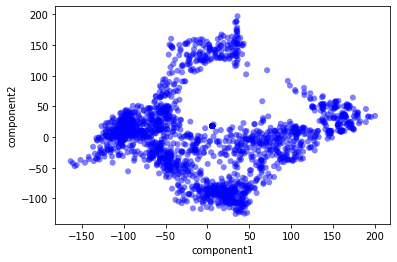

In [33]:
#Plotting the new dimensions
plt.scatter(result_isomap_image[:,0], result_isomap_image[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## TSNE: Dimensionality reduction of Tabular 
> Dataset used is the __mpg__ data set retrieved in the PCA

In [34]:
from sklearn.manifold import TSNE
print("Shape before applying tsne: ", transformed_df.shape)
model = TSNE(n_components=2, random_state=0, perplexity=5, n_iter=5000)
tsne_data = model.fit_transform(transformed_df)
print("Shape after applying tsne: ", tsne_data.shape)

Shape before applying tsne:  (398, 7)
Shape after applying tsne:  (398, 2)


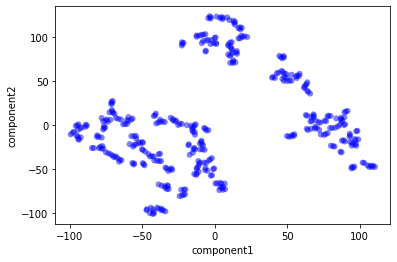

In [35]:
#Plotting the new dimensions
plt.scatter(tsne_data[:,0], tsne_data[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## TSNE: Dimensionality Reduction on Images
> Dataset used is digits data set retrieved in PCA

In [36]:
print("Shape before applying TSNE:: ", digits_df.data.shape)
image_model = TSNE(n_components=2, random_state=0, perplexity=5, n_iter=5000)
tsne_image_result = image_model.fit_transform(digits_df.data)
print("Shape after applying TSNE:: ", tsne_image_result.shape)

Shape before applying TSNE::  (1797, 64)
Shape after applying TSNE::  (1797, 2)


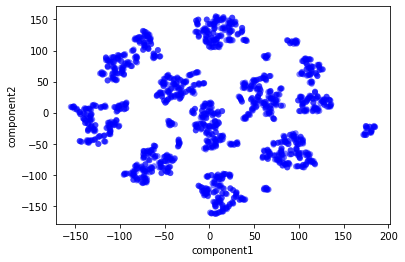

In [37]:
#Plotting the new dimensions
plt.scatter(tsne_image_result[:,0], tsne_image_result[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## UMAP: Dimensionality Reduction on Tabular Data
> Dataset used is __mpg__ dataset retrieved in the PCA

In [38]:
#Installing packages
!pip install umap-learn


     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=ece64c5ddbc617b9a84e2d45b193bc5fab6e40f334594d6426e09e1c9e079967
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=abb7364ffd2d264f29927f3ce4abc3108637b47041d677639e337da21588ad39
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [39]:
import umap

print("Shape before applying UMAP: ", transformed_df.shape)
umap_data = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(transformed_df)
print("Shape after applying UMAP: ", umap_data.shape)

Shape before applying UMAP:  (398, 7)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Shape after applying UMAP:  (398, 2)


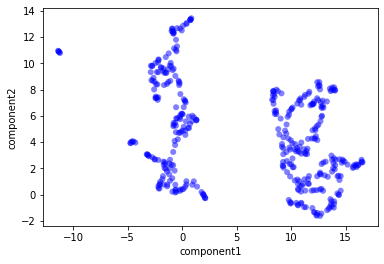

In [40]:
#Plotting the new dimensions
plt.scatter(umap_data[:,0], umap_data[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## UMAP: Dimensionality Reduction on Image Data
> Dataset used is digits image data set retrieved in PCA

In [41]:
print("Shape before applying UMAP:: ", digits_df.data.shape)
umap_data_image = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(digits_df.data)
print("Shape after applying UMAP:: ", umap_data_image.shape)

Shape before applying UMAP::  (1797, 64)
Shape after applying UMAP::  (1797, 2)


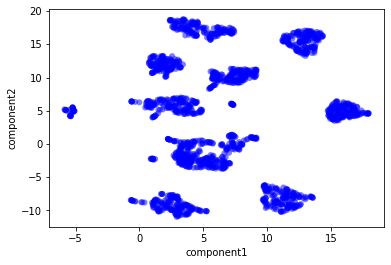

In [42]:
#Plotting the new dimensions
plt.scatter(umap_data_image[:,0], umap_data_image[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## Comparison of Algorithms

These Algorithms can be divided into 2 groups based on the type of data they are suitable for.

Group 1). PCA and SVD: Suitable for Lienar data  
Group 2). LLE, ISOMAP, TSNE and UMAP: Suitable for Manifold data

1. PCA: PCA is a popular dimensionality reduction technique with the dense data and works well on Linear data. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principle components. Resulting in the lower dimension projection of the data that preserves the maximum data variance.

2. SVD: SVD also works on the Linear data. It works very well with the sparse data. SVD uses matrix factorization for dimensionality reduction. SVD is way to find Eigen vectors or to do Matrix factorization.

>Important points of SVD and PCA:
>- The new components created by SVD/PCA are less interpretable.
>- The may lead to information loss.
>- They requires data to be Normalized/Standardized before applying >the algorithm.
>- They work only on numeric data.

3. LLE: LLE creates an embedding of the dataset and attempt to preserves relationship between the neighbourhoods in the dataset. LLE works very well on Manifold data. LLE uses variery of tangent linear patches to model the manifold.  LLE can be thought of as applying the PCA on each of these neighborhood locally, producing an linear hyperplane and then comparing the results globally to find the best non linear embedding. LLE doesn't perform well on the very large dimension of data. 

4. ISOMAP: ISOMAP creates embedding of the dataset and attempts to preserve relationship in the dataset. ISOMAP converts data to lower dimension in a way that maintains __geodesic distances__(optimized distance along the discovered manifold). Unlike LLE ISOMAP performs very well on very large dimensions of data.

5. TSNE: TSNE stands for t-distributed Stochastic Neighbor Embeddings. The algorithm converts relationships in the original space into t-distributions or normal distributions with small sample sizes and relatively unknown standard deviation. This makes t-SNE very sesitive to the local structure.

6. UMAP: UMAP is similar to t-SNE but with probably higher processing speed. It can be applied to sparse matrices thus no need to apply PCA or SVD as preprocessing step.




## Analysis of Data distribution results

1. PCA: 
- Tabular Data: After plotting the data between first two dimensions after dimensionality reduction we will find that data is Linearly distributed.
- Image Data: The image data is not Linearly distributed. It has uniform distribution.  

2. SVD
- Tabular Data: Unlike PCA the distribution of data after dimensionality reduction is non linear. It is uniform. Although first two component of reduced data contains about the similar data variance which is about 90%.
- Image Data: Image data distribution of SVD and PCA is very similar and is uniformly distributed in both cases.

3. LLE
- Tabular Data: The data is distributed in the form of dense patches of neighbors.
- Image Data: The data is distributed as patches of neighbor but most of them are clustered at center.

4. ISOMAP
- Tabular Data: The data is distributed as patches of close neighbors and the data with patches is distributed uniformally instead of being clustered like LLE.
- Image Data: Image data distribution is similar to LLE, but more uniformly distributed then LLE.

5. t-SNE
- Tabular Data: The data is distributed in the form of patches of neighboring points. The patches are better isolated then ISOMAP and are more balanced in terms of data points in them.
- Image Data: The data distribution is in the form of patches of neighboring points where patches are very well distributed and are not overlapping each other and patches are not centered at same location. 

6. UMAP
- Tabular Data: The data distribution looks very similar to the t-SNE where patches are well separated from each other.
- Image Data: Data distribution looks very similar to t-SNE where patches of neighboring points are well ditributed and not overlapping each other. The patches are not centered at same location.